In [278]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load training set 
file_path = "./dataset/monk/monks-2.train"
training_set = pd.read_csv(file_path, sep=" ", header=None, skipinitialspace=True)
training_set.head()

,0,1,2,3,4,5,6,7
0,1,1,1,1,1,1,2,data_2
1,1,1,1,1,1,2,1,data_3
2,1,1,1,1,1,2,2,data_4
3,0,1,1,1,1,3,1,data_5
4,0,1,1,1,1,4,1,data_7


In [280]:
# load test set 
path_test = "./dataset/monk/monks-2.test"
test_set = pd.read_csv(path_test, sep=" ", header=None, skipinitialspace=True)
test_set.head()

,0,1,2,3,4,5,6,7
0,1,1,1,1,1,1,1,data_1
1,1,1,1,1,1,1,2,data_2
2,1,1,1,1,1,2,1,data_3
3,1,1,1,1,1,2,2,data_4
4,1,1,1,1,1,3,1,data_5


In [281]:
# drop the last column with the ID which is not useful 
training_set = training_set.drop(training_set.columns[-1], axis=1)

test_set = test_set.drop(test_set.columns[-1], axis=1)

In [282]:
training_set.head()

,0,1,2,3,4,5,6
0,1,1,1,1,1,1,2
1,1,1,1,1,1,2,1
2,1,1,1,1,1,2,2
3,0,1,1,1,1,3,1
4,0,1,1,1,1,4,1


In [283]:
test_set.head()

,0,1,2,3,4,5,6
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2
2,1,1,1,1,1,2,1
3,1,1,1,1,1,2,2
4,1,1,1,1,1,3,1


In [284]:
# select  the first column that contains the target 
target_training = training_set.iloc[:, 0]  
target_test = test_set.iloc[:, 0]

In [285]:
# select all columns except the fisrt 
input_training = training_set.iloc[:, 1:]
input_training = pd.get_dummies(input_training, columns=input_training.columns[0:], drop_first=False)

input_test = test_set.iloc[:, 1:]
input_test = pd.get_dummies(input_test, columns=input_test.columns[0:], drop_first=False)

input_training, input_test = input_training.align(input_test, join='left', axis=1, fill_value=0)

In [286]:
input_training = input_training.to_numpy().astype(np.float32)
input_test = input_test.to_numpy().astype(np.float32)

In [287]:
target_training = target_training.to_numpy().reshape(-1, 1).astype(np.float32)
target_test = target_test.to_numpy().reshape(-1, 1).astype(np.float32)

In [288]:
print(f" rows: {input_training.shape[0]}, columns: {input_training.shape[1]}")

 rows: 122, columns: 17


In [289]:
print(f" rows: {target_training.shape[0]}, columns: {target_training.shape[1]}")

 rows: 122, columns: 1


In [290]:
print(f" rows: {input_test.shape[0]}, columns: {input_test.shape[1]}")

 rows: 432, columns: 17


In [291]:

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.001),
                          input_shape=(input_training.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with accuracy as a metric
model.compile(optimizer=SGD(learning_rate=0.2, momentum=0.9),
              loss='mean_squared_error',
              metrics=['accuracy'])

# Model summary
model.summary()

c:\Users\lepor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 4)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77 (308.00 B)

 Trainable params: 77 (308.00 B)

 Non-trainable params: 0 (0.00 B)

In [292]:


# Train the model without validation split
history = model.fit(input_training, target_training, 
                    epochs=500, 
                    batch_size=32)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5127 - loss: 0.2541 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5517 - loss: 0.2544
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6239 - loss: 0.2497
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6087 - loss: 0.2496 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6843 - loss: 0.2444 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6758 - loss: 0.2404
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6940 - loss: 0.2329 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7661 - loss: 0.2280
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8369 - loss: 0.2203 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8057 - loss: 0.2145
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8557 - loss: 0.2091 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8955 - lo

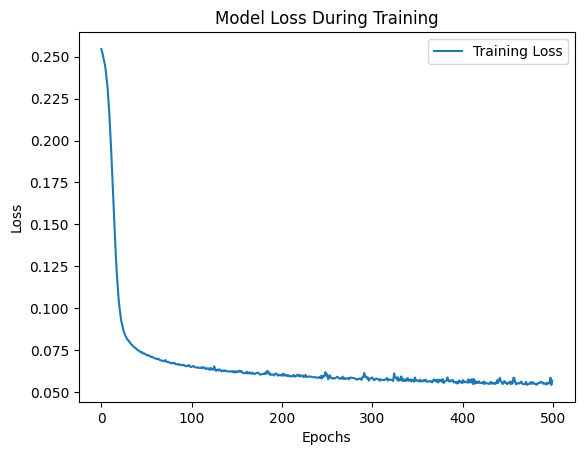

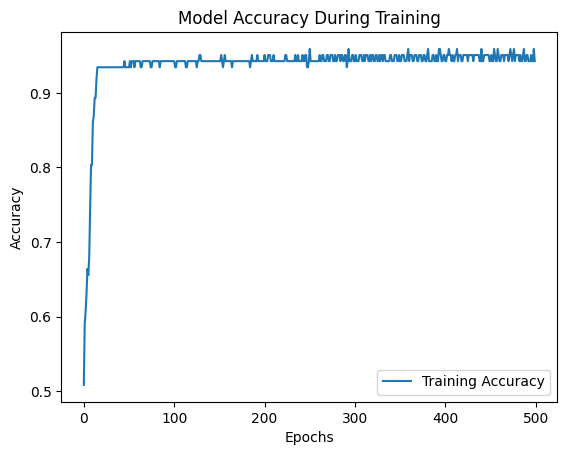

In [293]:
# Visualize Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [294]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(input_test, target_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.0421  
Test Loss: 0.04831197112798691
Test Accuracy: 0.9606481194496155
